In [ ]:
!pip install oandapyV20

     |████████████████████████████████| 51 kB 373 kB/s 
  Created wheel for oandapyV20: filename=oandapyV20-0.7.2-py3-none-any.whl size=70037 sha256=fdcda44f5c5e20c7edaae2b21f0dead360d36aab56ab97f47e2584ded359228b
  Stored in directory: /root/.cache/pip/wheels/92/bd/c8/f003f96afcd47c2f94db568cf69d5834fd044897ced995babe
Successfully built oandapyV20


In [ ]:
from oandapyV20 import API

In [ ]:
access_id = '101-009-20877502-001'
access_token = '2beffe8a59bb06860ea76ebfc52a45f4-2be3f8ee706cbfa57c0cc07076ae4788'

In [ ]:
client = API(access_token=access_token, environment='practice')

In [ ]:
import oandapyV20.endpoints.accounts as accounts
r = accounts.AccountList()
client.request(r)

{'accounts': [{'id': '101-009-20877502-001', 'tags': []},
  {'id': '101-009-20877502-002', 'tags': ['HEDGING']}]}

In [ ]:
import oandapyV20.endpoints.instruments as instruments

params = {
    'count':1000,
    'granularity':'M1'
}

r = instruments.InstrumentsCandles(instrument='USD_JPY', params=params)
close_values = list(map(lambda point: [float(point['mid']['c'])], client.request(r)['candles']))
close_values

[[113.799],
 [113.807],
 [113.81],
 [113.8],
 [113.802],
 [113.8],
 [113.799],
 [113.798],
 [113.792],
 [113.786],
 [113.772],
 [113.78],
 [113.782],
 [113.794],
 [113.79],
 [113.8],
 [113.802],
 [113.805],
 [113.8],
 [113.805],
 [113.802],
 [113.796],
 [113.793],
 [113.775],
 [113.772],
 [113.788],
 [113.774],
 [113.8],
 [113.799],
 [113.794],
 [113.793],
 [113.788],
 [113.786],
 [113.788],
 [113.786],
 [113.794],
 [113.818],
 [113.815],
 [113.815],
 [113.807],
 [113.822],
 [113.821],
 [113.834],
 [113.812],
 [113.814],
 [113.822],
 [113.821],
 [113.82],
 [113.817],
 [113.812],
 [113.81],
 [113.814],
 [113.802],
 [113.794],
 [113.791],
 [113.788],
 [113.78],
 [113.776],
 [113.776],
 [113.776],
 [113.764],
 [113.762],
 [113.761],
 [113.763],
 [113.761],
 [113.759],
 [113.774],
 [113.776],
 [113.812],
 [113.822],
 [113.83],
 [113.854],
 [113.866],
 [113.86],
 [113.841],
 [113.848],
 [113.85],
 [113.847],
 [113.851],
 [113.848],
 [113.852],
 [113.854],
 [113.858],
 [113.847],
 [113.84],


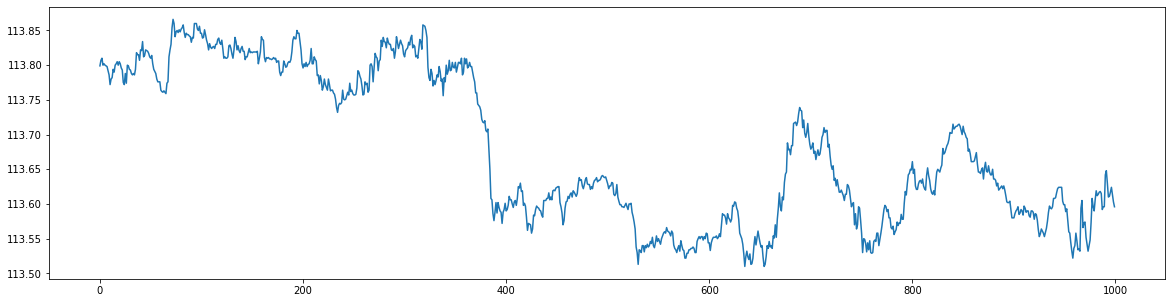

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(close_values)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
scaler = mms.fit(close_values)
close_values_norms = scaler.transform(close_values)
close_values_norms

array([[0.81179775],
       [0.83426966],
       [0.84269663],
       [0.81460674],
       [0.82022472],
       [0.81460674],
       [0.81179775],
       [0.80898876],
       [0.79213483],
       [0.7752809 ],
       [0.73595506],
       [0.75842697],
       [0.76404494],
       [0.79775281],
       [0.78651685],
       [0.81460674],
       [0.82022472],
       [0.82865169],
       [0.81460674],
       [0.82865169],
       [0.82022472],
       [0.80337079],
       [0.79494382],
       [0.74438202],
       [0.73595506],
       [0.78089888],
       [0.74157303],
       [0.81460674],
       [0.81179775],
       [0.79775281],
       [0.79494382],
       [0.78089888],
       [0.7752809 ],
       [0.78089888],
       [0.7752809 ],
       [0.79775281],
       [0.86516854],
       [0.85674157],
       [0.85674157],
       [0.83426966],
       [0.87640449],
       [0.87359551],
       [0.91011236],
       [0.84831461],
       [0.85393258],
       [0.87640449],
       [0.87359551],
       [0.870

In [ ]:
import more_itertools
import numpy as np

train_data = np.array(list(more_itertools.windowed(close_values_norms[:-1], 100)))
train_target = np.array(close_values_norms[100:])


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

model = Sequential()
model.add(LSTM(100))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=0)
model.fit(train_data, train_target, batch_size=600, epochs=10, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10
2/2 [==============================] - 5s 721ms/step - loss: 0.2252 - val_loss: 0.0233


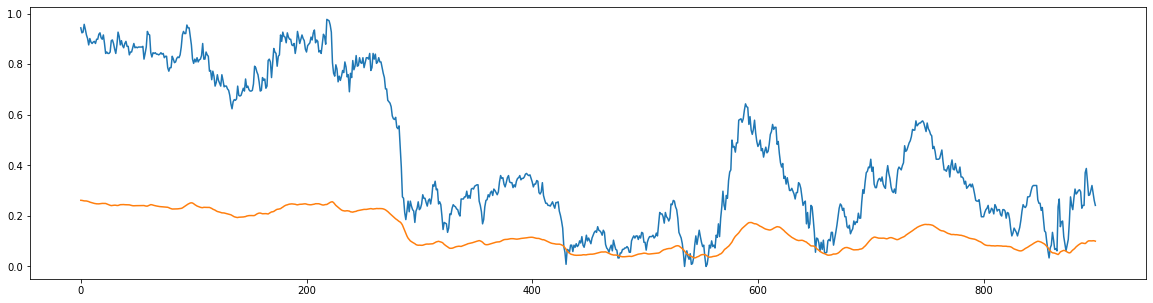

In [ ]:
pred_target = model.predict(train_data)
plt.figure(figsize=(20,5))
plt.plot(train_target)
plt.plot(pred_target)
plt.show(close_values)

In [ ]:
#本番
import oandapyV20.endpoints.instruments as instruments
from sklearn.preprocessing import MinMaxScaler
import more_itertools
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping


params = {
    'count':5000,
    'granularity':'M1'
}

r = instruments.InstrumentsCandles(instrument='USD_JPY', params=params)
close_values = list(map(lambda point: [float(point['mid']['c'])], client.request(r)['candles']))

#正規化
mms = MinMaxScaler()
scaler = mms.fit(close_values)
close_values_norms = scaler.transform(close_values)

#データ
train_data = np.array(list(more_itertools.windowed(close_values_norms[:-1], 100)))
train_target = np.array(close_values_norms[100:])

#モデル構築
model = Sequential()
model.add(LSTM(100))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

#学習
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=0)
model.fit(train_data, train_target, batch_size=600, epochs=10, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10
8/8 [==============================] - 9s 773ms/step - loss: 0.1226 - val_loss: 0.0169


In [ ]:
import oandapyV20.endpoints.orders as orders

params = {
    'count':500,
    'granularity':'M1'
}

r = instruments.InstrumentsCandles(instrument='USD_JPY', params=params)
close_values = list(map(lambda point: [float(point['mid']['c'])], client.request(r)['candles']))

close_values_norms = scaler.transform(close_values)
latest_data = np.array(list([close_values_norms]))
predict_price = model.predict(latest_data)
next_price = scaler.inverse_transform(predict_price)[0][0]

units = '10000' if close_values[-1] <= next_price else '-10000'

order_params = {
    'order': {
        'units' : units,
        'instrument': 'USD_JPY',
        'type': 'MARKET',
        'positionFill': 'DEFAULT',
        'takeProfitOnFill': {
            'price': str(round(next_price,3))
        }
    }  
}

r = orders.OrderCreate(access_id, data=order_params)
client.request(r)
 

{'lastTransactionID': '22',
 'orderCreateTransaction': {'accountID': '101-009-20877502-001',
  'batchID': '20',
  'id': '20',
  'instrument': 'USD_JPY',
  'positionFill': 'DEFAULT',
  'reason': 'CLIENT_ORDER',
  'requestID': '60902658575419504',
  'takeProfitOnFill': {'price': '113.721', 'timeInForce': 'GTC'},
  'time': '2021-10-28T12:17:13.352275780Z',
  'timeInForce': 'FOK',
  'type': 'MARKET_ORDER',
  'units': '10000',
  'userID': 20877502},
 'orderFillTransaction': {'accountBalance': '3000860.0000',
  'accountID': '101-009-20877502-001',
  'baseFinancing': '0',
  'batchID': '20',
  'commission': '0.0000',
  'financing': '0.0000',
  'fullPrice': {'asks': [{'liquidity': '250000', 'price': '113.594'}],
   'bids': [{'liquidity': '250000', 'price': '113.590'}],
   'closeoutAsk': '113.599',
   'closeoutBid': '113.585',
   'timestamp': '2021-10-28T12:17:10.277702672Z'},
  'fullVWAP': '113.594',
  'gainQuoteHomeConversionFactor': '1',
  'guaranteedExecutionFee': '0.0000',
  'halfSpreadCost